In [12]:
import numpy as np
import pandas as pd


In [13]:
df = pd.read_csv('athlete_events.csv')
regoin_df = pd.read_csv('noc_regions.csv')

In [14]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [15]:
df.shape

(271116, 15)

In [16]:
df = df[df['Season'] == 'Summer']

In [17]:
df.shape

(222552, 15)

In [18]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

In [19]:
region_df.tail()

NameError: name 'region_df' is not defined

In [20]:
region_df = regoin_df

In [21]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

In [22]:
del regoin_df

In [23]:
df = df.merge(region_df,on='NOC',how='left')

In [24]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [25]:
df['region'].unique().shape

(206,)

In [26]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [27]:
df.duplicated().sum()

1385

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

In [30]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [31]:
df = pd.concat([df,pd.get_dummies(df['Medal']).astype(int)],axis=1)

In [32]:
df.shape

(221167, 20)

In [33]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  Bronze  Gold  Silver  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0

In [34]:
df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

region  Gold  Silver  Bronze
0              USA  2472    1333    1197
1           Russia  1220     974     994
2          Germany  1075     987    1064
3               UK   635     729     620
4            Italy   518     474     454
..             ...   ...     ...     ...
200        Lesotho     0       0       0
201        Albania     0       0       0
202          Libya     0       0       0
203  Liechtenstein     0       0       0
204        Liberia     0       0       0

[205 rows x 4 columns]

In [35]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [36]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [37]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [38]:
medal_tally

region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [39]:
years = df['Year'].unique().tolist()

In [40]:
years.sort()

In [41]:
years.insert(0,'Overall')

In [42]:
country = np.unique(df['region'].dropna().values).tolist()

In [43]:
country.sort()

In [44]:
country.insert(0,'Overall')

In [45]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)
    

In [46]:
fetch_medal_tally(df,year='Overall',country='Overall')

            region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]


# Overall Analysis
  * No. of editions
  * No. of cities
  * No. of events/sports
  * No. of athletes
  * participating nations

In [47]:
editions = df['Year'].unique()

In [48]:
editions.shape[0] -1

28

In [49]:
df['City'].unique().shape[0]

23

In [50]:
df['Sport'].unique().shape[0]

52

In [51]:
df['Event'].unique().shape[0]

651

In [52]:
df['Name'].unique().shape[0]

116122

In [53]:
df['region'].unique().shape[0]

206

In [54]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [55]:
nations_over_time.rename(columns={'Year':'Edition','count':'No. of Countries'}, inplace = True)

In [56]:
import plotly.express as px

In [57]:
fig = px.line(nations_over_time, x="Edition", y="No. of Countries")
fig.show()

In [58]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896     43
26  1900     90
25  1904     95
27  1906     74
23  1908    109
24  1912    107
14  1920    158
20  1924    131
22  1928    122
21  1932    131
18  1936    150
15  1948    153
19  1952    149
16  1956    151
17  1960    150
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
1   2008    302
2   2012    302
0   2016    306

In [59]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

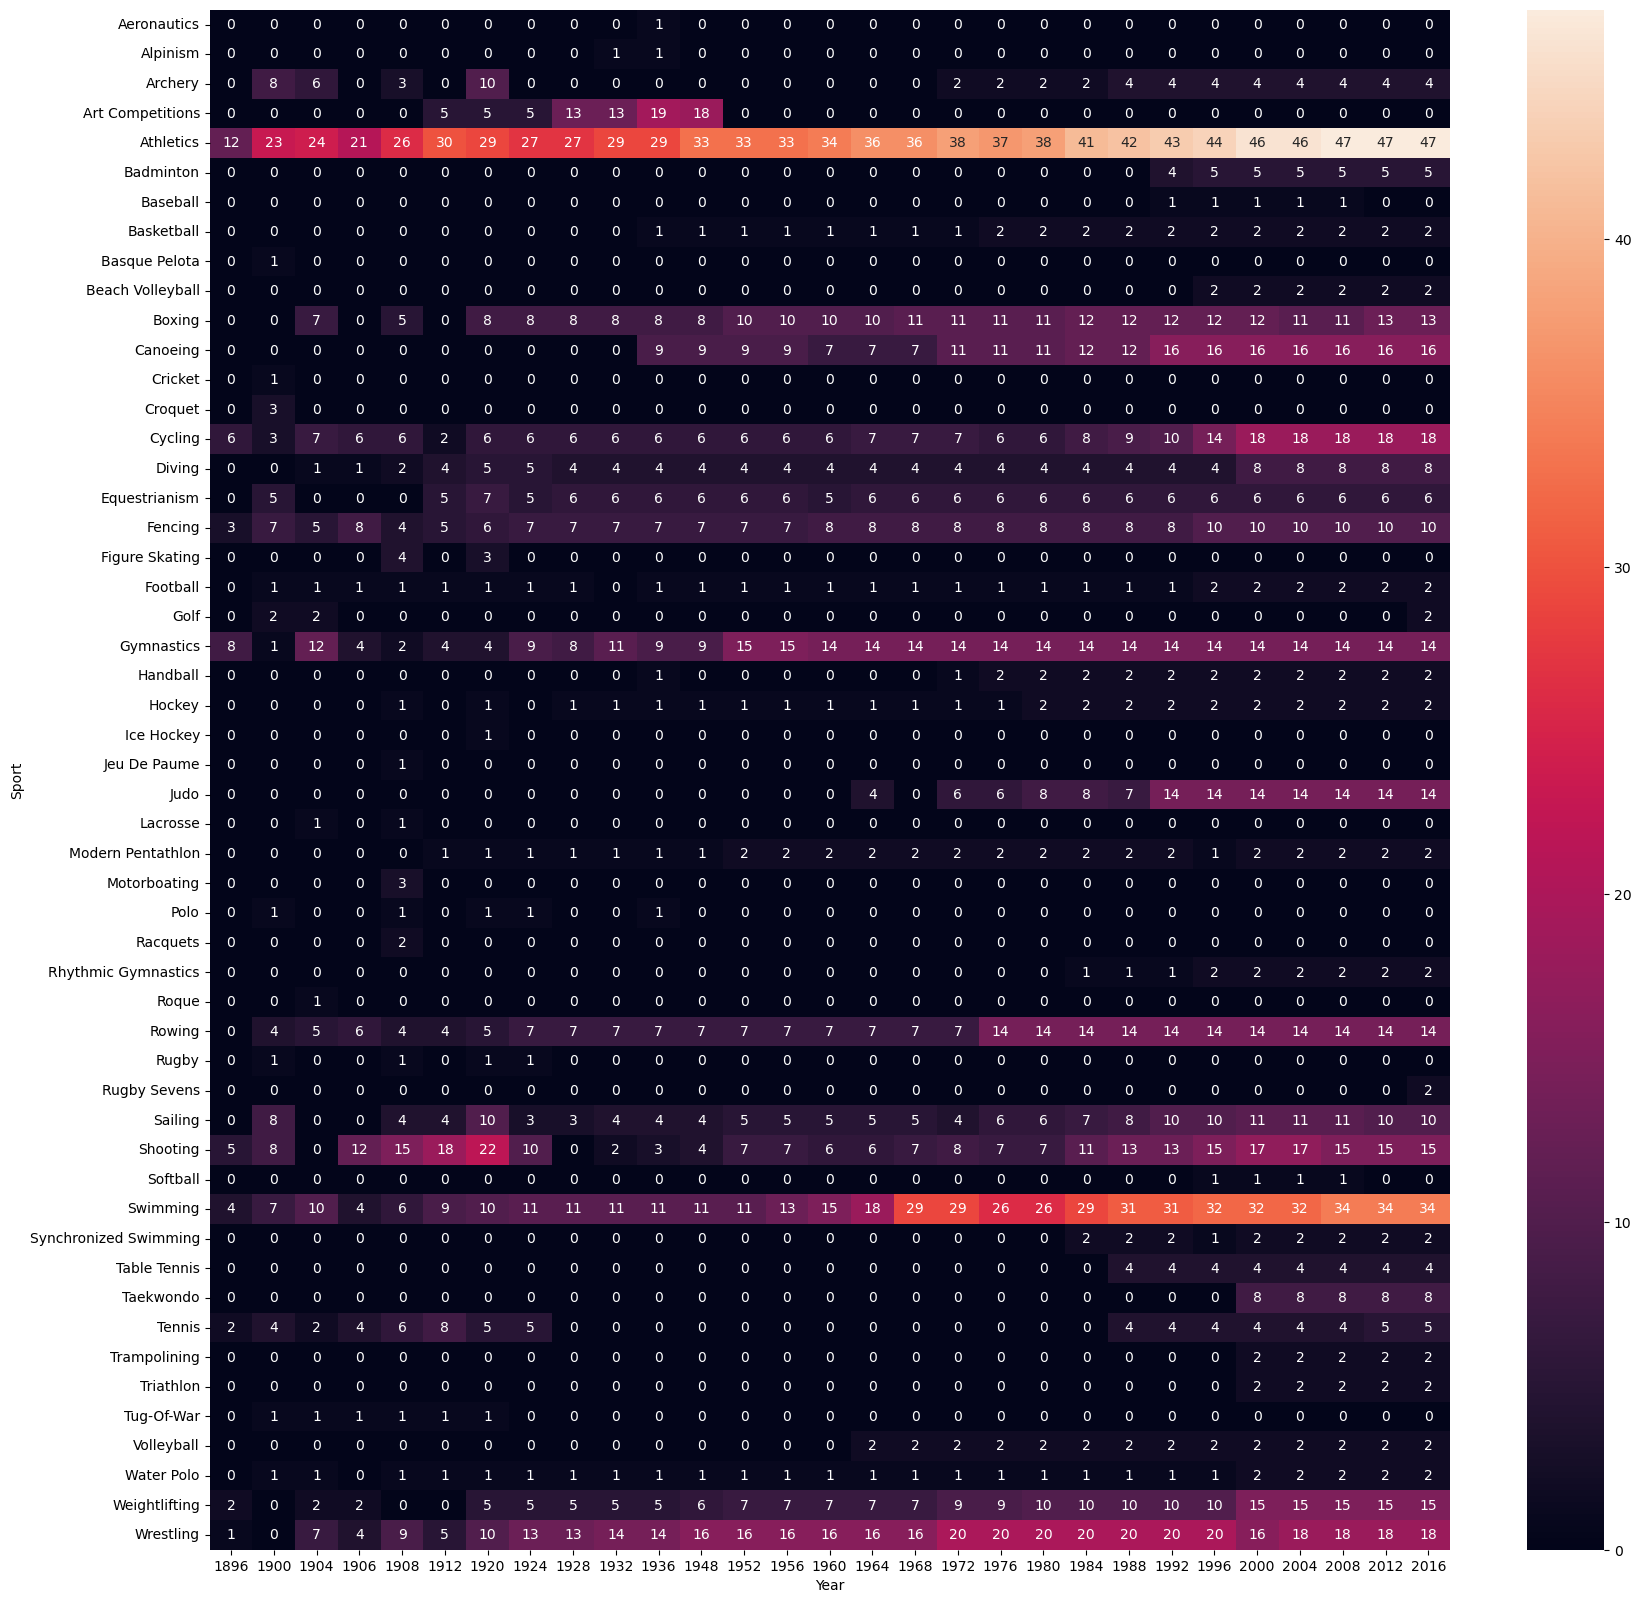

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'), annot=True)

In [61]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [62]:
most_successful(df,'Gymnastics')

Name  Medals       Sport          region
0    Larysa Semenivna Latynina (Diriy-)      18  Gymnastics          Russia
19         Nikolay Yefimovich Andrianov      15  Gymnastics          Russia
43          Borys Anfiyanovych Shakhlin      13  Gymnastics          Russia
67                          Takashi Ono      13  Gymnastics           Japan
100                          Sawao Kato      12  Gymnastics           Japan
124             Aleksey Yuryevich Nemov      12  Gymnastics          Russia
145           Viktor Ivanovych Chukarin      11  Gymnastics          Russia
161              Vra slavsk (-Odloilov)      11  Gymnastics  Czech Republic
179           gnes Keleti-Srkny (Klein)      10  Gymnastics         Hungary
193       Vitaly Venediktovich Shcherbo      10  Gymnastics          Russia
209     Aleksandr Nikolayevich Dityatin      10  Gymnastics          Russia
225         Polina Hryhorivna Astakhova      10  Gymnastics          Russia
244                    Akinori Nakayama      10  Gymnastics           Japan
260       Nadia Elena Comneci (-Conner)       9  Gymnastics         Romania
272           Yury Yevlampiyevich Titov       9  Gymnastics          Russia

# Country wise
  - Countrywise medal tally per year(line plot)
  - What countries are good at heapmap
  - Most successful Athletes(Top 10)

In [63]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13872\3249058805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

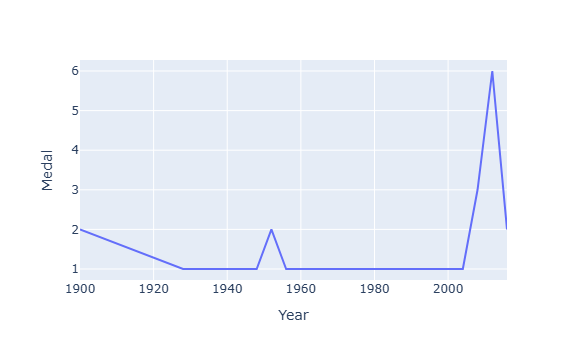

In [65]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show() 

<Axes: xlabel='Year', ylabel='Sport'>

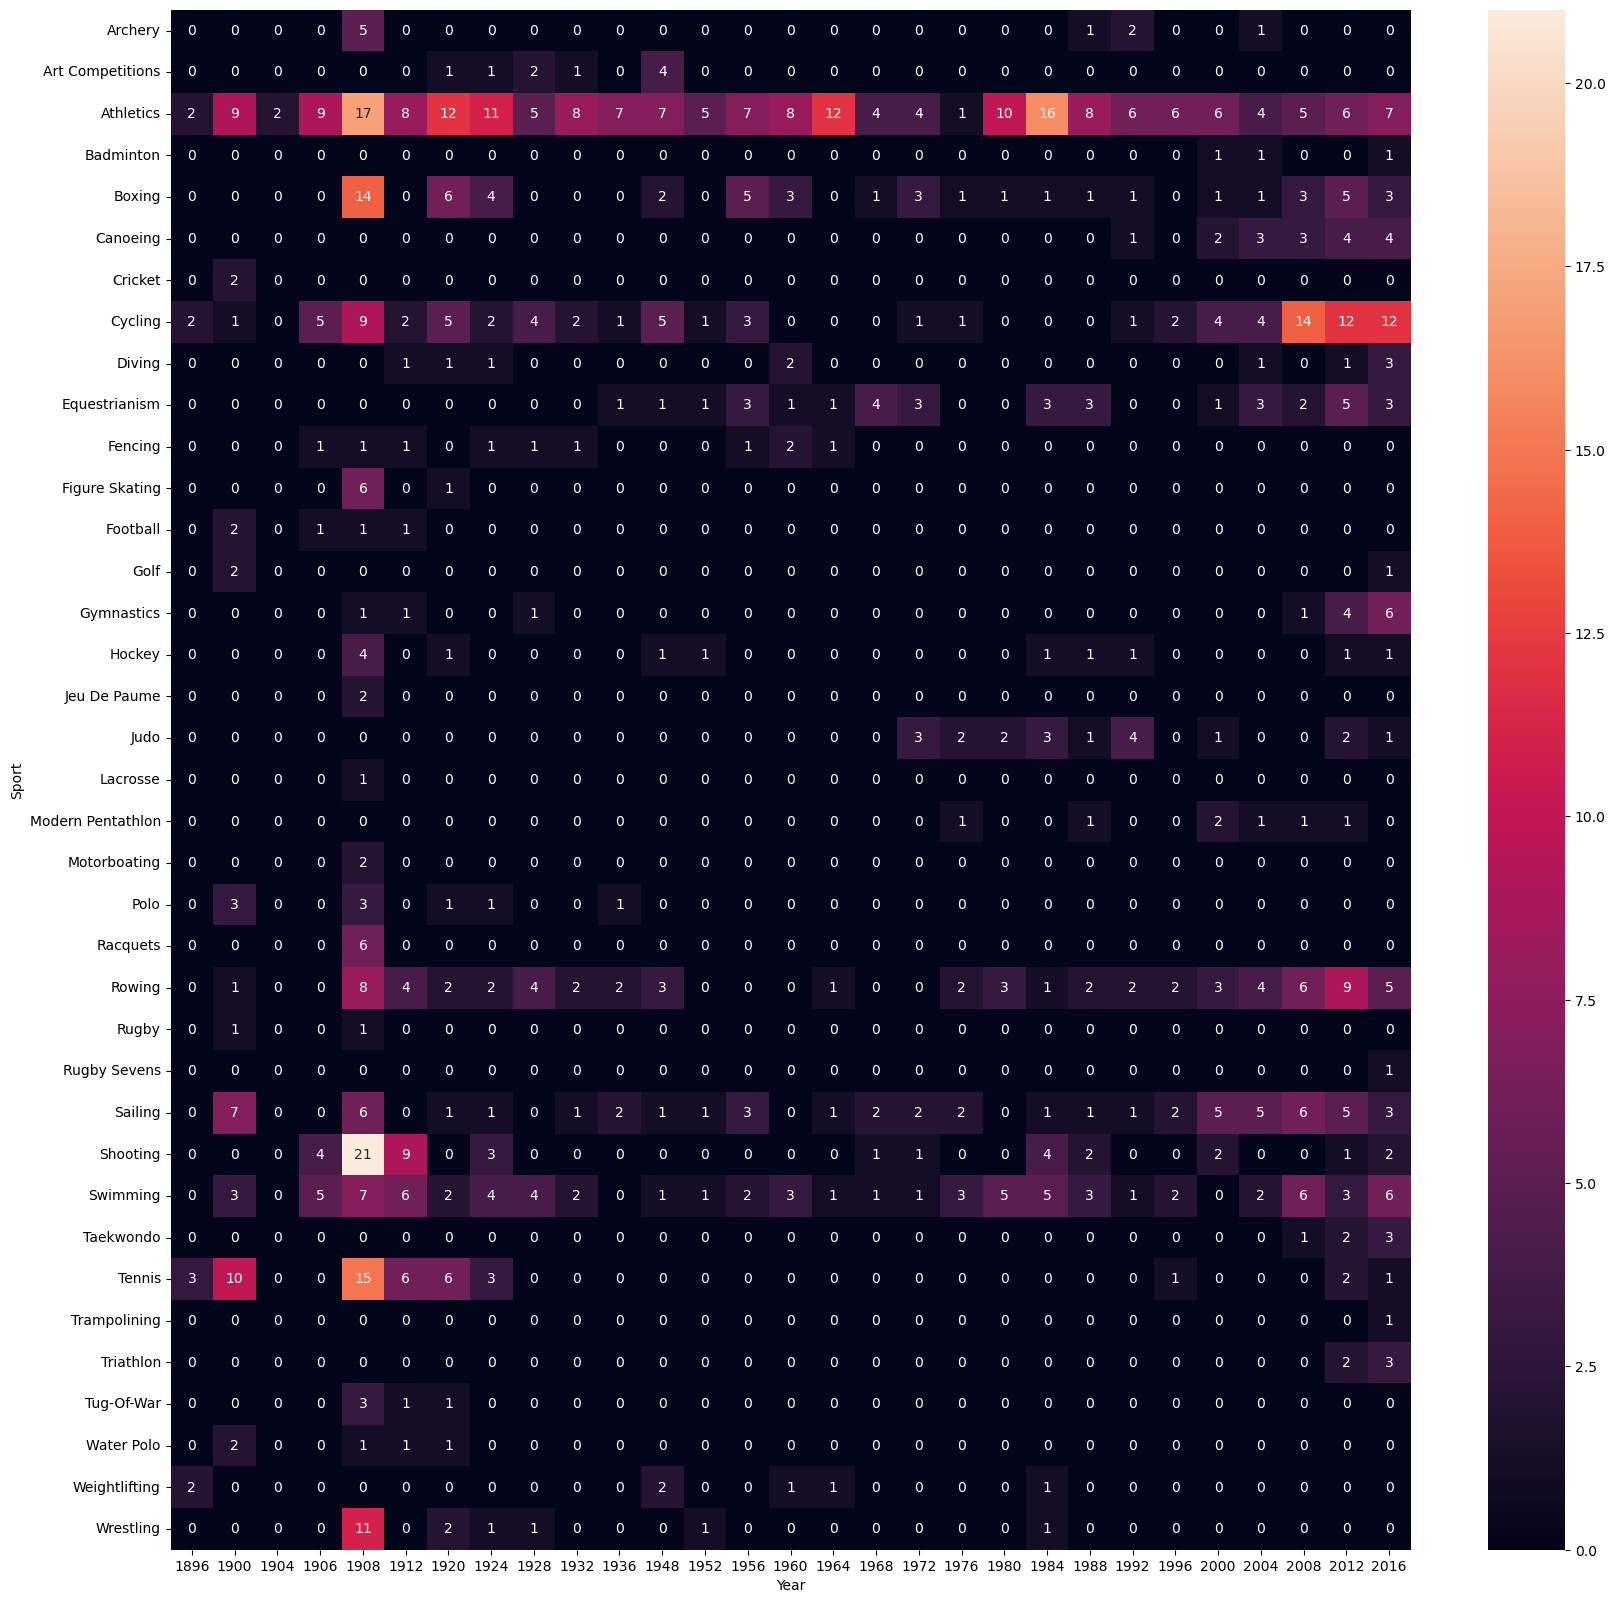

In [66]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

In [67]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name', 'count', 'Sport']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [68]:
most_successful(df,'Jamaica')

Name  Medals      Sport
0           Merlene Joyce Ottey-Page       9  Athletics
19   Veronica Angella Campbell-Brown       8  Athletics
30                Usain St. Leo Bolt       8  Athletics
40           Shelly-Ann Fraser-Pryce       6  Athletics
47     Donald O'Reilly "Don" Quarrie       4  Athletics
56     Herbert Henry "Herb" McKenley       4  Athletics
62               Arthur Stanley Wint       4  Athletics
68    Novlene Hilaire Williams-Mills       4  Athletics
75                       Yohan Blake       4  Athletics
81          Sherone Anmarica Simpson       3  Athletics
88              Juliet Jean Cuthbert       3  Athletics
98                    Kerron Stewart       3  Athletics
103                  Elaine Thompson       3  Athletics
106         Shericka Nicola Williams       3  Athletics
109      Beverly McDonald (-Stewart)       3  Athletics

# Athlete wise Analysis

In [69]:
import plotly.figure_factory as ff

In [70]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [71]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()


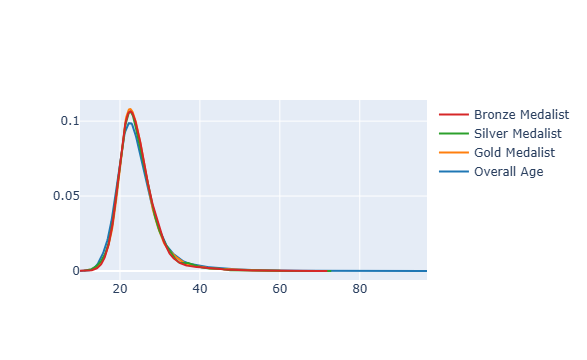

In [72]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [73]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [74]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [75]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)

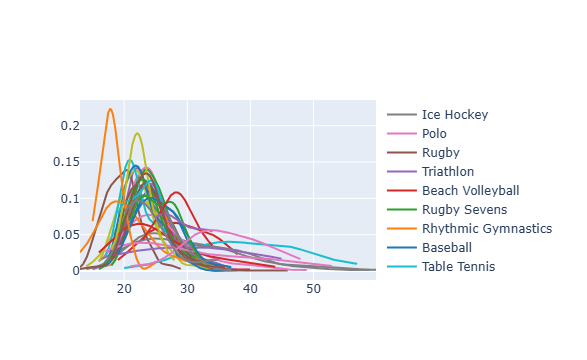

In [76]:
fig.show()

In [77]:
athlete_df.fillna({'Medal': 'No Medal'}, inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

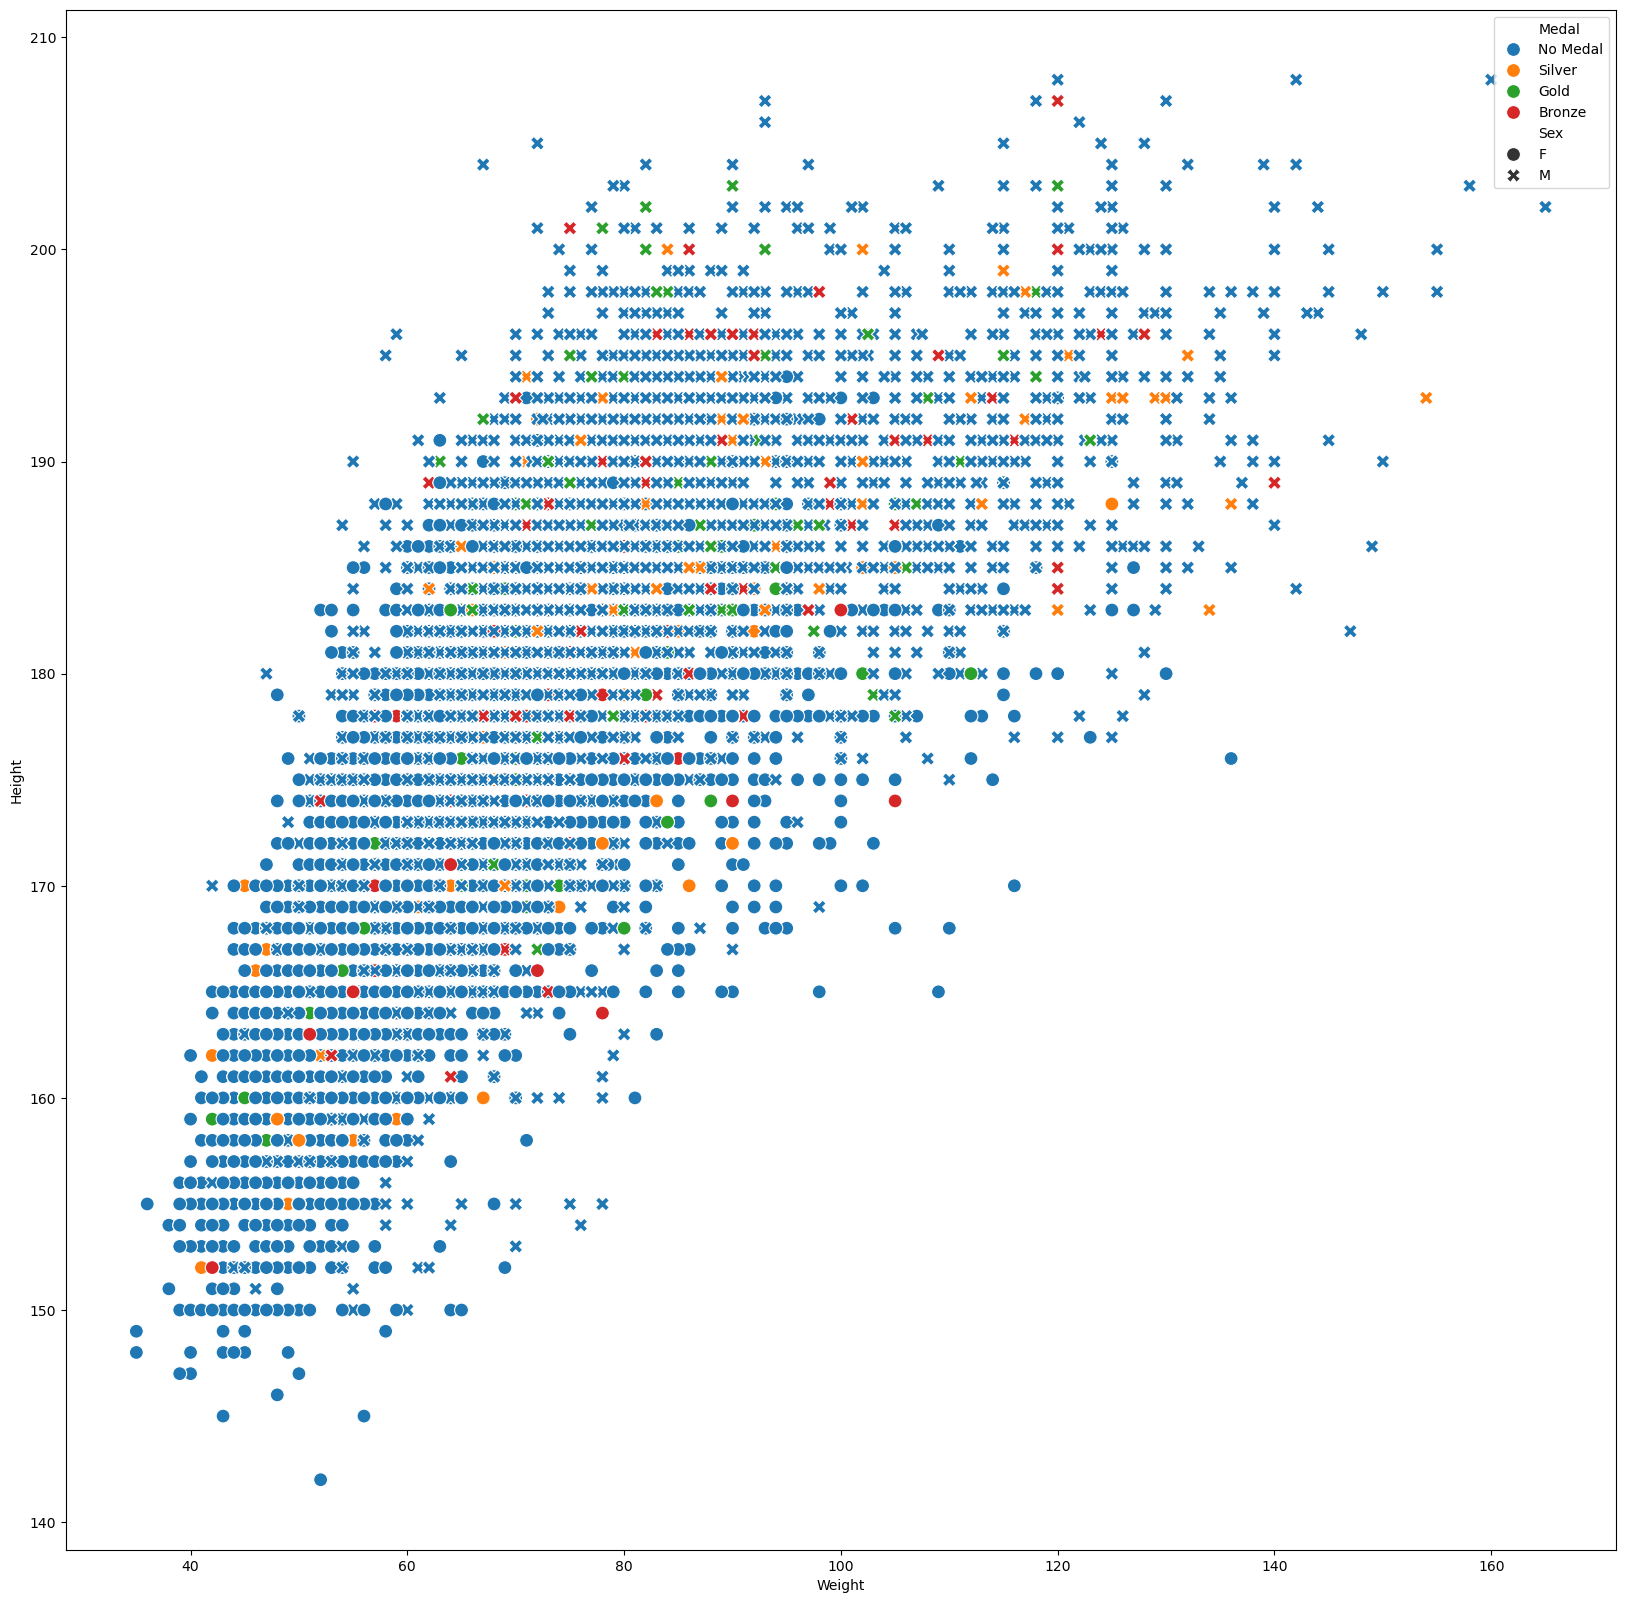

In [82]:
plt.figure(figsize=(20,20))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],
                         hue=temp_df['Medal'], style=temp_df['Sex'], s=100)

In [83]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()


In [84]:
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

In [85]:
final.fillna(0, inplace=True)

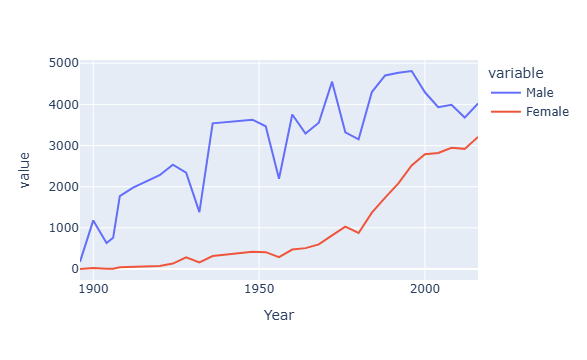

In [86]:
fig = px.line(final, x="Year", y=["Male", "Female"])
fig.show()